In [1]:
import pandas as pd
import numpy as np




In [2]:
data = pd.read_csv("Report with Immunization best-Copy1.csv", header=0)
#print("Data: \n", data[:100]) # See if data is read correctly

## We only need columns "Day" and "Current Infected" for now
df = data.loc[:,["Day", "Current Infected"]]
df1 = data.loc[:,["Day", "Current Infected","Recovered","Susceptibles"]]


## Find Expected Number of infected per day ##
## Group Data by "Day" and count the number of Infected
df1_mean = df1.groupby(["Day"]).mean().reset_index()
df_mean = df.groupby(["Day"]).mean().rename(columns={"Current Infected": "Mean"}).reset_index()


## Find Sample Mean ##
# Confidence Intervals for Day 1 and Day 2
joined = pd.merge(df, df_mean, on="Day")
day1 = joined[:100]
day1_mean = (day1["Current Infected"] - day1["Mean"])**2

sm_day1 = day1_mean.sum()/(100-1)
print("Mean Day 1: ", day1["Mean"][0])
print("Sample Mean Day 1: ", sm_day1)

day2 = joined[100:200]
day2_mean = (day2["Current Infected"] - day2["Mean"])**2
sm_day2 = day2_mean.sum()/(100-1)
print("Mean Day 2: ", day2["Mean"][100])
print("Sample Mean Day 2: ", sm_day2)

t = 1.96
print("Day 1 CI: [", round(day1["Mean"][0] - t * np.sqrt(sm_day1/100),4), ","
      ,round(day1["Mean"][0] + t * np.sqrt(sm_day1/100),4), "]")
print("Day 2 CI: [", round(day2["Mean"][100] - t * np.sqrt(sm_day2/100),4), ","
      ,round(day2["Mean"][100] +  t * np.sqrt(sm_day2/100),4), "]")

print("Average Number of Infected:\n", df_mean[:27])
print("Average Number of Infected:\n", df1_mean)

## With Immunization ##
# Data has no header but has similar structure to the first data
data2 = pd.read_csv("Report with Immunization best.csv", header = None)
#print("Data with Immunization: \n", data2[:100]) # See if data is read correctly

# Only need columns "Day" and "Current Infected" 
df2 = data2.iloc[:,[1,4]].rename(columns={1:"Day", 4:"Current Infected"})

## Find Expected Number of Infected per day ##
## Group by "Day" and count the number of infected
df2_mean = df2.groupby(["Day"]).mean().rename(columns={"Current Infected": "Mean"}).reset_index()

## Find Sample Mean ##
# Confidence Intervals for Day 1 and Day 2
joined2 = pd.merge(df2, df2_mean, on="Day")
day1_2 = joined2[:100]
day1_mean_2 = (day1_2["Current Infected"] - day1_2["Mean"])**2

sm_day1_2 = day1_mean_2.sum()/(100-1)
print("Mean Day 1 w/ Immunization: ", day1_2["Mean"][0])
print("Sample Mean Day 1 w/ Immunization: ", sm_day1_2)

day2_2 = joined2[100:200]
day2_mean_2 = (day2_2["Current Infected"] - day2_2["Mean"])**2
sm_day2_2 = day2_mean_2.sum()/(100-1)
print("Mean Day 2 w/ Immunization: ", day2_2["Mean"][100])
print("Sample Mean Day 2 w/ Immunization: ", sm_day2_2)

t = 1.96
print("Day 1 CI w/ Immunization: [", round(day1_2["Mean"][0] - t * np.sqrt(sm_day1_2/100),4), ","
      ,round(day1_2["Mean"][0] + t * np.sqrt(sm_day1_2/100),4), "]")
print("Day 2 CI w/ Immunization: [", round(day2_2["Mean"][100] - t * np.sqrt(sm_day2_2/100),4), ","
      ,round(day2_2["Mean"][100] +  t * np.sqrt(sm_day2_2/100),4), "]")


Mean Day 1:  2.49
Sample Mean Day 1:  2.2500707070707078
Mean Day 2:  2.49
Sample Mean Day 2:  4.449464646464647
Day 1 CI: [ 2.196 , 2.784 ]
Day 2 CI: [ 2.0766 , 2.9034 ]
Average Number of Infected:
     Day   Mean
0     1   2.49
1     2   5.41
2     3  11.64
3     4  21.95
4     5  34.63
5     6  45.60
6     7  47.97
7     8  41.48
8     9  29.25
9    10  16.20
10   11   8.02
11   12   3.40
12   13   1.52
13   14   0.70
14   15   0.28
15   16   0.08
16   17   0.02
17   18   0.00
18   19   0.00
19   20   0.00
20   21   0.00
21   22   0.00
22   23   0.00
23   24   0.00
24   25   0.00
25   26   0.00
26   27   0.00
Average Number of Infected:
     Day  Current Infected  Recovered  Susceptibles
0     1              2.49       0.00        132.51
1     2              5.41       0.00        129.59
2     3             11.64       0.00        123.36
3     4             21.95       1.00        112.05
4     5             34.63       2.49         97.88
..  ...               ...        ...         

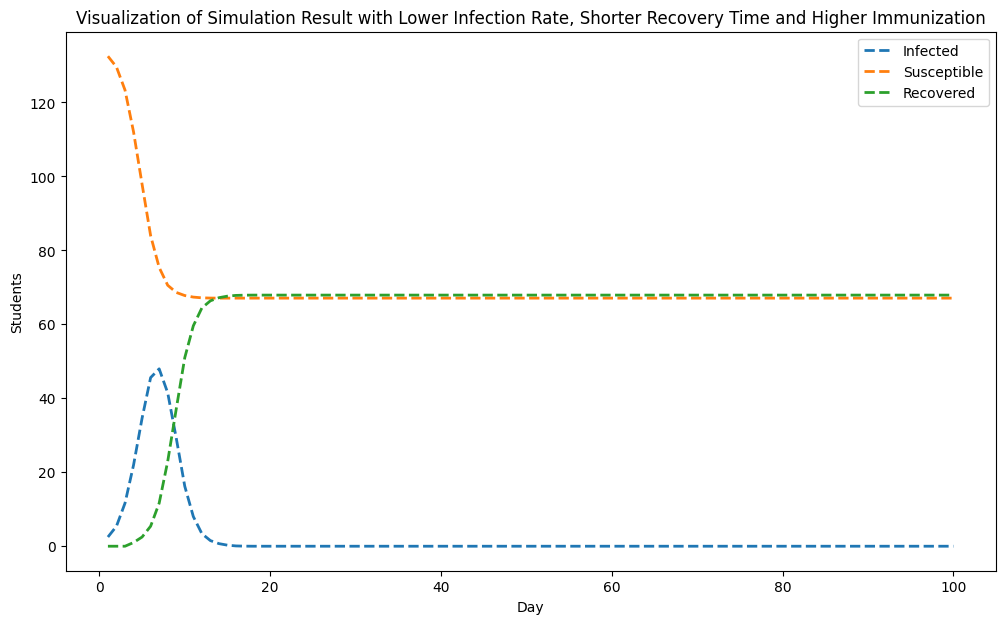

In [3]:
import matplotlib.pyplot as plt
plt.figure(facecolor='w', figsize=(12, 7))
# 绘制线图
plt.plot(df1_mean['Day'], df1_mean['Current Infected'],
            linestyle = '--', lw=2, label='Infected')
plt.plot(df1_mean['Day'], df1_mean['Susceptibles'],
            linestyle = '--', lw=2, label='Susceptible')
plt.plot(df1_mean['Day'], df1_mean['Recovered'],
            linestyle = '--', lw=2, label='Recovered')

plt.legend()
# 添加标题和标签
plt.title('Visualization of Simulation Result with Lower Infection Rate, Shorter Recovery Time and Higher Immunization')
plt.xlabel('Day')
plt.ylabel('Students')
plt.savefig('result_visual_best.pdf')
plt.savefig('result_visual_best.png')
# 显示图形
plt.show()